## Stage 1: Diferential Human Proteomics Analysis 
These stage is performed to preprocessing the data to make the analysis of proteomic data reproducible and automatable.
- __Author__ : Cancer Molecular Dynamics Laboratory
- __Version__: 1.0

* Volcano plot 
* Up-genes list 
* Down-genes list

## 0. Requirements 

## Stage 1. Top Up and Down

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel("../data/Human Proteins.xlsx")

In [3]:
print(df.shape)
df.head(3)

(2040, 13)


,Accession Number,Alternate ID,Cancer,Cancer.1,Cancer.2,control,control.1,control.2,Average cancer,average control,FC,LOg2FC,pvalue
0,P02768,ALB,1161,1035,971,2897,2911,2997,1055.666667,2935.000000,0.359682,-1.475206,0.000031
1,P02787,TF,1162,1144,1139,2588,2722,2664,1148.333333,2658.000000,0.432029,-1.210800,0.000232
2,P00738,HP,479,493,500,948,988,972,490.666667,969.333333,0.506190,-0.982250,0.000020


In [4]:
# Rename columns
df.rename(columns = {'Alternate ID':'GeneNames','LOg2FC':'log2FC','pvalue':'p-value'}, inplace = True)
# Drop NaN to perform the plots
df.dropna(subset = ['log2FC','p-value'], inplace=True)
print(df.shape)
print(len(df['Accession Number'].unique()))
df.head(3)

(1382, 13)
1382


,Accession Number,GeneNames,Cancer,Cancer.1,Cancer.2,control,control.1,control.2,Average cancer,average control,FC,log2FC,p-value
0,P02768,ALB,1161,1035,971,2897,2911,2997,1055.666667,2935.000000,0.359682,-1.475206,0.000031
1,P02787,TF,1162,1144,1139,2588,2722,2664,1148.333333,2658.000000,0.432029,-1.210800,0.000232
2,P00738,HP,479,493,500,948,988,972,490.666667,969.333333,0.506190,-0.982250,0.000020


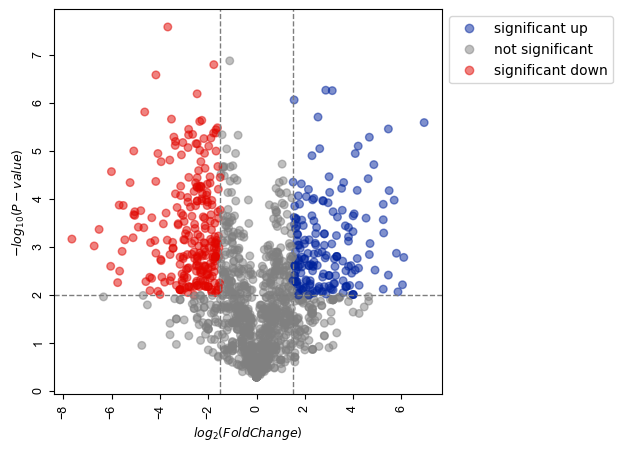

In [5]:
# First Volcano Plot
from bioinfokit import analys, visuz
visuz.GeneExpression.volcano(df=df, lfc='log2FC', pv='p-value', lfc_thr=(1.5, 1.5), pv_thr=(0.01, 0.01), 
    color=("#00239CFF", "grey", "#E10600FF"), valpha=0.5, plotlegend=True, legendpos='upper right', 
    legendanchor=(1.46,1), dotsize=30, gstyle=2, sign_line=True, r=600,
                            geneid="GeneNames",  genenames=(),
                        show=True, figtype='svg')

In [6]:
up_protein = df.loc[df['p-value']<0.01].loc[df['log2FC']>1.5]
print(up_protein.shape)
up_protein.head(2)

(179, 13)


,Accession Number,GeneNames,Cancer,Cancer.1,Cancer.2,control,control.1,control.2,Average cancer,average control,FC,log2FC,p-value
7,P35579,MYH9,549,550,527,181,179,184,542.000000,181.333333,2.988971,1.579649,0.000140
8,P02533,KRT14,547,565,557,117,112,111,556.333333,113.333333,4.908824,2.295377,0.000013


In [7]:
# input to https://maayanlab.cloud/enrichr-kg
for gene in up_protein['GeneNames']:
    print(gene)

MYH9
KRT14
KRT6A
KRT6B
KRT5
KRT6C
KRT16
KRT17
LTF
COL12A1
TNC
KRT19
FBN1
POSTN
MPO
KRT8
SOD2
MYH11
PDIA4
PPIB
LMNB1
ATP5F1B
COL6A2
HSPD1
LAMP1
ATP1A1
TAGLN
GLUD1
nan
EGFR
LAMA3
CANX
PRKDC
LAMB1
GANAB
GLG1
AGRN
TGM1
COPB2
COL7A1
LAMC2
DEFA1
NID1
PRDX3
UGGT1
MYOF
ANXA3
IDH2
ATP5F1A
TFRC
HSPA9
SLC3A2
STOM
RPN1
CTSG
COPA
CKAP4
AIFM1
ITGB1
CORO1A
PKP1
PSMD2
SERPINH1
COPG1
NDRG1
MZB1
ELANE
CCT2
TPR
HEXB
DLST
HSPE1
ATP2A2
GAA
PAFAH1B1
TCP1
MYDGF
HLA-C
COPB1
SND1
MMP9
ANXA7
HLA-A
NID2
IGF2R
MANF
PSMB9
LAMA5
PTPRC
RPN2
CCT7
OGDH
RAB2A
GPNMB
SSBP1
HNRNPR
SLC2A1
PRMT1
EHD1
ANXA8L1
HNRNPH1
UQCRC1
DARS
PFKP
SLC25A3
PSMB10
HNRNPL
LMAN2
SEC31A
MTHFD1
TMED7
THBS2
HLA-DRA
DDX17
S100A12
RAP1B
ARCN1
DDOST
PSAT1
S100P
PRTN3
EIF2S1
ACOT7
PPP3CA
RPS16
CYBB
ARG1
RPL3
PCYOX1
PXDN
ATP1B3
NAPA
RPL4
PSMD12
RAC1
ECHS1
FERMT3
RPL7A
PARP1
RPL14
NUCB2
SNRPD2
ADA
PSMC2
RPS18
TSNAX
PSMC5
EFHD2
PLAUR
MACF1
TPP2
PLBD1
DERA
DPP7
RALA
SUCLG1
PSMD6
DPYD
CAMK2D
SCP2
FAM83H
OAT
RUVBL2
PCNA
RHOG
FARSB
PSME3
RPS26
SFPQ
LIN7C
D

In [8]:
down_protein = df.loc[df['p-value']<0.01].loc[df['log2FC']<-1.5]
print(down_protein.shape)
down_protein.head(2)

(252, 13)


,Accession Number,GeneNames,Cancer,Cancer.1,Cancer.2,control,control.1,control.2,Average cancer,average control,FC,log2FC,p-value
3,P02790,HPX,251,231,215,725,742,767,232.333333,744.666667,0.311996,-1.680399,0.000004
4,P01024,C3,199,200,187,715,754,702,195.333333,723.666667,0.269922,-1.889387,0.000212


In [9]:
# input to https://maayanlab.cloud/enrichr-kg
for gene in down_protein['GeneNames']:
    print(gene)

HPX
C3
MYH2
APOB
ACTN2
A2M
MYH1
MYH7
CFH
ENO3
CKM
AHNAK
SERPINA1
ALDOA
MB
CP
PYGM
MYH8
TNXB
TXN
DSG3
FLNC
GC
LUM
A1BG
TTR
AHSG
DSC2
MYH3
A2ML1
APOA1
TPM1
GSTP1
GOT1
IGKC
SBSN
ENO2
APOH
SERPINB5
IVL
CRNN
SERPINB3
LYPD3
SPRR3
nan
KNG1
MYL1
SPRR1B
SPRR1A
ITIH1
PPL
CFB
UGP2
ALDOC
PYGB
SERPINC1
IGHG2
SERPINB4
MYBPC1
ITIH4
IGLC2
SPINK5
KRT4
CA3
SOD1
PGM1
F13A1
ECM1
AMBP
TNNC1
ITIH2
F2
SOD3
DCN
PGLYRP2
APOA2
CDH1
SERPINB1
SERPINA3
RBP4
C5
COL3A1
VWF
CAST
CFI
GBP6
HRG
TNNC2
AKR1B10
LRG1
THBS4
KLHL41
MYLPF
ADH7
ABI3BP
SERPINF1
CD109
SERPINB13
COMP
C9
SERPIND1
CLEC3B
C8B
CRYAB
PCOLCE
CD163
CSTA
FHL1
LTBP4
CKB
C1R
C8A
AHNAK2
CSPG4
TPPP3
ACO1
TIMP1
ALDH3A1
COL1A2
MAP4
EVPL
NIBAN2
C6
S100A1
AGT
SPTB
SPTA1
MYOM3
SPINT1
MCAM
LTBP2
COL18A1
PDLIM5
C7
C8G
NECTIN4
BIN1
C2
SLC9A3R1
ANK1
GLO1
CRISP3
TWF2
SPARC
SELL
PFKM
C1S
CPN2
CFHR2
TRIM72
QSOX1
KLK13
KLKB1
SERPINF2
CES1
PDLIM3
CD55
TNNI1
AKR1C1
CD14
RCN3
PGM5
PTPRF
GBE1
SERPINA7
PDLIM1
FOLR2
OGN
NACA
GPC1
AK1
TWF1
ALCAM
CST3
ACAT2
SERBP1
CILP
CDH13
TBCA